In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import xarray as xr
from scipy.interpolate import interp1d

%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [2]:
filename = '/Users/gabriel/Desktop/DATA-LASP/cmo_dmin.nc'
dataset = nc.Dataset(filename)

In [3]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)

In [4]:
df.std()

Time    4323 days 04:46:26.336035264
X                         205.803477
Y                         692.838916
Z                          97.178327
dtype: object

In [17]:
df_y_fill = df['Y'].fillna(692.8)
df_x_fill = df['X'].fillna(205.8)
df_z_fill = df['Z'].fillna(97.2)


In [20]:
#NaN filled method

df['flag'] = 0
df['flag'][df['Y'].isnull()==True] = 1


df['fill_y'] = df['Y'].interpolate(kind='std')
df['fill_x'] = df['X'].interpolate(kind='std')
df['fill_z'] = df['Z'].interpolate(kind='std')



ymean = df['Y'].rolling(50).mean()
ystd = df['Y'].rolling(50).std()


xmean = df['X'].rolling(50).mean()
xstd = df['X'].rolling(50).std()




/var/folders/nj/1lttj3_x16ldy51707n65swm0000gn/T/ipykernel_37193/266533622.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][df['Y'].isnull()==True] = 1


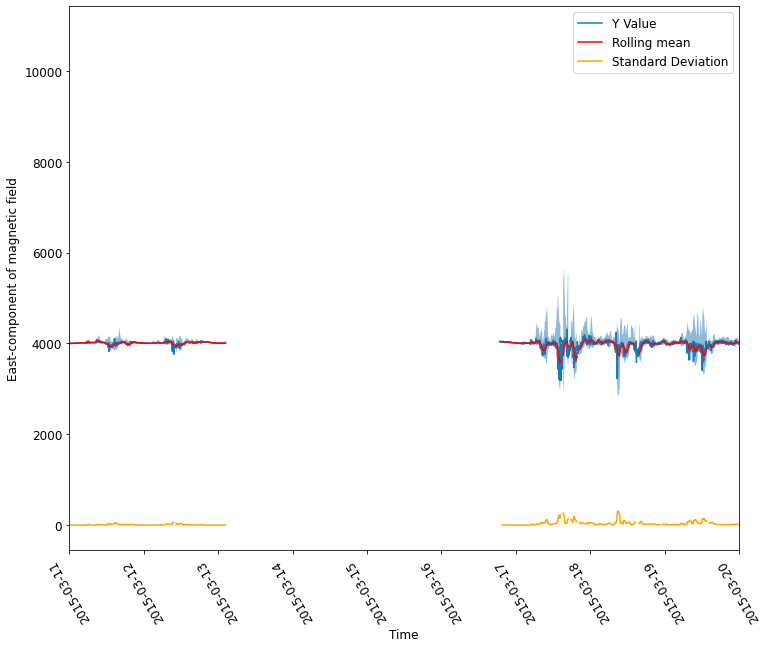

In [30]:
plt.figure(figsize=(12,10))

plt.plot(df['Time'], df['Y'], label='Y Value')

plt.plot(df['Time'], ymean, color='red', label='Rolling mean')
plt.plot(df['Time'], ystd, color='orange', label='Standard Deviation')

plt.fill_between(df['Time'], ymean-3*ystd, ymean+3*xstd, alpha=0.5)

plt.xlim([datetime.date(2015, 3, 11), datetime.date(2015, 3, 20)])
plt.xlabel('Time')
plt.ylabel('East-component of magnetic field')

plt.xticks(rotation=120)
plt.legend()


In [32]:
filename1 = '/Users/gabriel/Desktop/DATA-LASP/frd_dmin.nc'
dataset1 = nc.Dataset(filename)

ds1 = xr.open_dataset(filename1)
df1 = ds1.to_dataframe()
df1.reset_index(inplace=True)

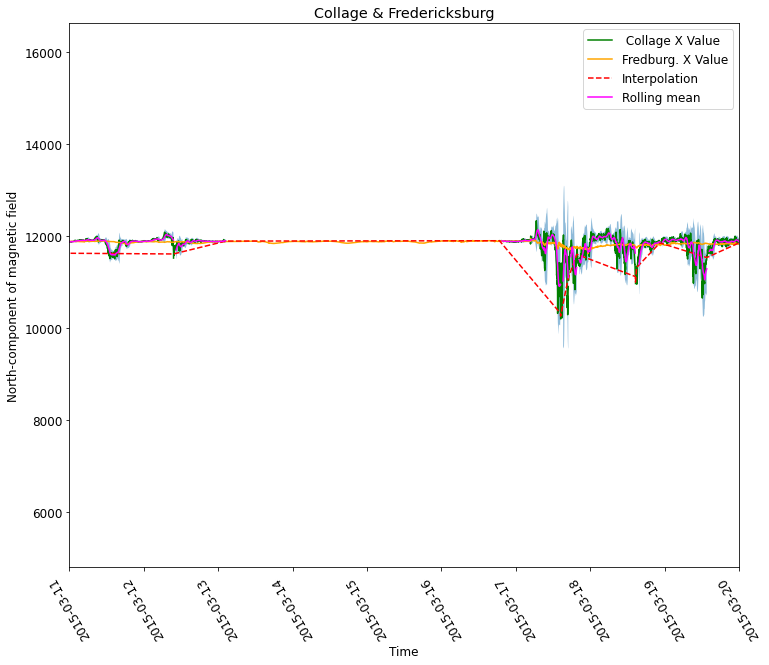

In [42]:
plt.figure(figsize=(12,10))
plt.plot(df['Time'], df['X'], label=' Collage X Value', color='green')
plt.plot(df1['Time'], df1['X']-9150, label='Fredburg. X Value', color='orange')

plt.fill_between(df['Time'], xmean-3*xstd, xmean+3*xstd, alpha=0.5)

plt.plot(df['Time'][df['flag']==True], df['fill_x'][df['flag']==True], label='Interpolation', 
         color='red', linestyle='dashed')
plt.plot(df['Time'], xmean, color='magenta', label='Rolling mean')

plt.xlim([datetime.date(2015, 3, 11), datetime.date(2015, 3, 20)])
plt.xlabel('Time')
plt.ylabel('North-component of magnetic field')
plt.title('Collage & Fredericksburg')
plt.xticks(rotation=120)
plt.legend()

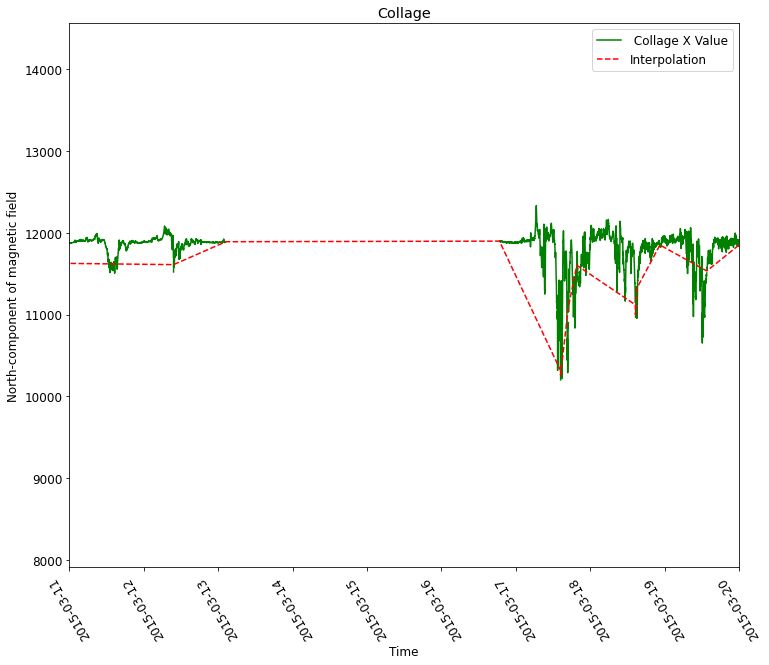

In [49]:
plt.figure(figsize=(12,10))
plt.plot(df['Time'], df['X'], label=' Collage X Value', color='green')
plt.plot(df['Time'][df['flag']==True], df['fill_x'][df['flag']==True], label='Interpolation', 
         color='red', linestyle='dashed')
plt.xlim([datetime.date(2015, 3, 11), datetime.date(2015, 3, 20)])
plt.xlabel('Time')
plt.ylabel('North-component of magnetic field')
plt.title('Collage')
plt.xticks(rotation=120)
plt.legend()